IMAGE CLASSIFICATION

In [1]:

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
#Loading the dataset
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

In [6]:
train_X

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

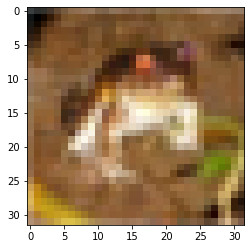

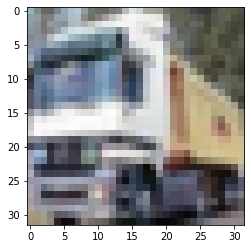

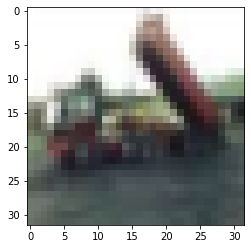

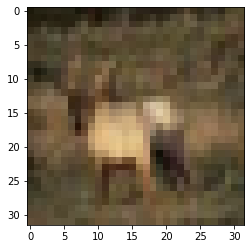

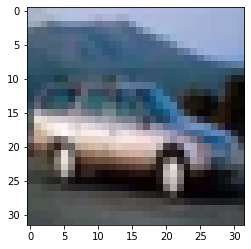

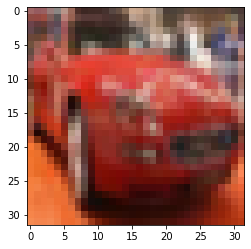

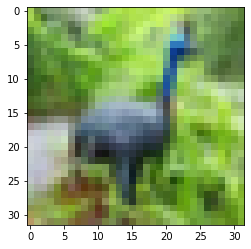

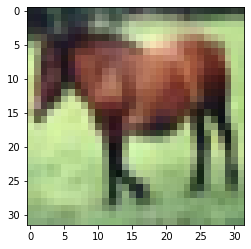

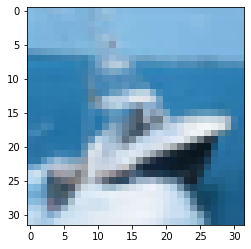

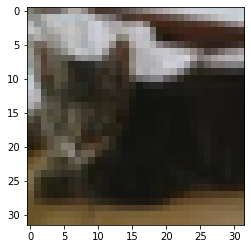

In [7]:
#Plotting data
import matplotlib.pyplot as plt
num=10
plt.figure()
for i in range(num):
    plt.subplot()
    plt.imshow(train_X[i])
    plt.show()


In [8]:
#building the input vector from the 32x32 pixels
train_X = train_X.reshape(train_X.shape[0], 32, 32, 3)
test_X = test_X.reshape(test_X.shape[0], 32, 32, 3)

In [9]:
#Conerting the pixels into float type
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')

In [10]:
#Normalizing 
train_X=train_X/255.0
test_X=test_X/255.0

In [11]:
# one-hot encoding 
classes = 10
print("Shape before one-hot encoding: ", train_Y.shape)
train_Y = to_categorical(train_Y, classes)
test_Y = to_categorical(test_Y, classes)
print("Shape after one-hot encoding: ", train_Y.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [12]:
# building CNN Model
model = Sequential()

In [13]:
# convolutional layer
model.add(Conv2D(50, (3,3), activation='relu', input_shape=(32, 32, 3)))

In [14]:
# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [15]:
model.add(Conv2D(125, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [16]:
# flatten output of conv
model.add(Flatten())

In [17]:
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

In [18]:
# output layer
model.add(Dense(classes, activation='softmax'))

In [19]:
# compiling the CNN Model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [20]:
# training the model for 10 epochs
model.fit(train_X, train_Y, batch_size=128, epochs=10, validation_data=(test_X, test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 710s 14ms/sample - loss: 1.6219 - accuracy: 0.3997 - val_loss: 1.1994 - val_accuracy: 0.5702
Epoch 2/10
50000/50000 [==============================] - 428s 9ms/sample - loss: 1.1871 - accuracy: 0.5769 - val_loss: 0.9885 - val_accuracy: 0.6582
Epoch 3/10
50000/50000 [==============================] - 441s 9ms/sample - loss: 0.9955 - accuracy: 0.6516 - val_loss: 0.8722 - val_accuracy: 0.6947
Epoch 4/10
50000/50000 [==============================] - 1200s 24ms/sample - loss: 0.8812 - accuracy: 0.6907 - val_loss: 0.7899 - val_accuracy: 0.7249
Epoch 5/10
50000/50000 [==============================] - 669s 13ms/sample - loss: 0.7933 - accuracy: 0.7223 - val_loss: 0.7464 - val_accuracy: 0.7378
Epoch 6/10
50000/50000 [==============================] - 351s 7ms/sample - loss: 0.7385 - accuracy: 0.7424 - val_loss: 0.7431 - val_accuracy: 0.7429
Epoch 7/10
50000/50000 [======================

In [21]:
# Final evaluation of the model 
scores = model.evaluate(test_X, test_Y, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.47%


In [22]:
#Saving the model
model.save('cifar_model.h5')

In [33]:
#Testing
import numpy as np 
from tensorflow.keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =image.load_img('C:\\Users\\afreen\\Downloads\\horse.jpg',target_size =(32,32))

In [34]:
test_image=np.array(test_image1)
test_image =np.expand_dims(test_image, axis =0) 
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
result = model.predict_classes([test_image])[0] 
print(result, results[result]) 


7 horse


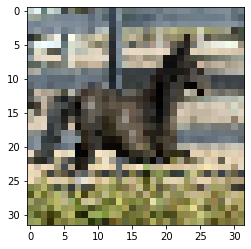

In [30]:
plt.imshow(test_image1)